In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

ws = gc.open('Copy of Balanced Dataset Four Classes').sheet1

cells = ws.range('B2:I2')
cells

cells[0].value = "hello"
cells[1].value = "hello"
cells[2].value = "hello"
cells[3].value = "hello"
cells[4].value = "hello"
cells[5].value = "hello"
cells

ws.update_cells(cells)

SpreadsheetNotFound: <Response [200]>

In [ ]:
variable_name = ""
originalStr = "ATGCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGCTTCGCTTCCTGGCCCTCGTTTCCTGGGACATCCCTGGGGCTAGAGCACTGGACAATGGATTGGCAAGGACGCCTACCATGGGCTGGCTGCACTGGGAGCGCTTCATGTGCAACCTTGACTGCCAGGAAGAGCCAGATTCCTGCATCAGTGAGAAGCTCTTCATGGAGATGGCAGAGCTCATGGTCTCAGAAGGCTGGAAGGATGCAGGTTATGAGTACCTCTGCATTGATGACTGTTGGATGGCTCCCCAAAGAGATTCAGAAGGCAGACTTCAGGCAGACCCTCAGCGCTTTCCTCATGGGATTCGCCAGCTAGCTAATTATGTTCACAGCAAAGGACTGAAGCTAGGGATTTATGCAGATGTTGGAAATAAAACCTGCGCAGGCTTCCCTGGGAGTTTTGGATACTACGACATTGATGCCCAGACCTTTGCTGACTGGGGAGTAGATCTGCTAAAATTTGATGGTTGTTACTGTGACAGTTTGGAAAATTTGGCAGATGGTTATAAGCACATGTCCTTGGCCCTGAATAGGACTGGCAGAAGCATTGTGTACTCCTGTGAGTGGCCTCTTTATATGTGGCCCTTTCAAAAGCCCAATTATACAGAAATCCGACAGTACTGCAATCACTGGCGAAATTTTGCTGACATTGATGATTCCTGGAAAAGTATAAAGAGTATCTTGGACTGGACATCTTTTAACCAGGAGAGAATTGTTGATGTTGCTGGACCAGGGGGTTGGAATGACCCAGATATGTTAGTGATTGGCAACTTTGGCCTCAGCTGGAATCAGCAAGTAACTCAGATGGCCCTCTGGGCTATCATGGCTGCTCCTTTATTCATGTCTAATGACCTCCGACACATCAGCCCTCAAGCCAAAGCTCTCCTTCAGGATAAGGACGTAATTGCCATCAATCAGGACCCCTTGGGCAAGCAAGGGTACCAGCTTAGACAGGGAGACAACTTTGAAGTGTGGGAACGACCTCTCTCAGGCTTAGCCTGGGCTGTAGCTATGATAAACCGGCAGGAGATTGGTGGACCTCGCTCTTATACCATCGCAGTTGCTTCCCTGGGTAAAGGAGTGGCCTGTAATCCTGCCTGCTTCATCACACAGCTCCTCCCTGTGAAAAGGAAGCTAGGGTTCTATGAATGGACTTCAAGGTTAAGAAGTCACATAAATCCCACAGGCACTGTTTTGCTTCAGCTAGAAAATACAATGCAGATGTCATTAAAAGACTTACTTTAA"
original = list(originalStr)
differences = []
conversions = {'A': 10, 'G': 20, 'T': 30, 'C': 40}

for i in range (321, 322):
  differences.clear()
  cells = ws.range('A' + str(i) + ':' + 'H' + str(i))
  mutantStr = cells[0].value
  mutant = list(mutantStr)

  ### SUBSTITUTION = 1 ###

  if len(mutant) == len(original):
    cells[1].value = 1

    for x in range (0, len(mutant)):
      if (mutant[x] != original[x]):
        differences.append(x)

    for x in range (1, len(differences)):
      if ((differences[x] - differences[x - 1]) > 2):
        cells[1].value = 4

    sum = 0
    for x in differences:
      sum += conversions[original[x]]
    sum /= len(differences)
    cells[2].value = sum

    sum = 0
    for x in differences:
      sum += conversions[mutant[x]]
    sum /= len(differences)
    cells[3].value = sum

    cells[4].value = differences[0]

    transitions = 0
    transversions = 0
    for x in differences:
      if ((original[x] == 'A' and mutant[x] == 'G') or (original[x] == 'G' and mutant[x] == 'A') or (original[x] == 'C' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'C')):
        transitions += 1
      if ((original[x] == 'A' and mutant[x] == 'C') or (original[x] == 'C' and mutant[x] == 'A') or (original[x] == 'A' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'A') or (original[x] == 'G' and mutant[x] == 'C') or (original[x] == 'C' and mutant[x] == 'G') or (original[x] == 'G' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'G')):
        transversions += 1
    cells[5].value = transitions
    cells[6].value = transversions

    cells[7].value = len(differences)

  ### DELETION = 2, DELINS = 4 ###

  elif len(mutant) < len(original):
    cells[1].value = 2

    for x in range (0, len(originalStr)):
      if (originalStr[:x] != mutantStr[:x]):
        startInd = x - 1
        break

    startInd -= (startInd) % 3
    endInd = startInd + len(original) - len(mutant)

    if (original[endInd] != mutant[startInd] and original[endInd + 1] != mutant[startInd + 1]):
      cells[1].value = 4

    for x in range(startInd, endInd):
      differences.append(x)

    sum = 0
    for x in differences:
      sum += conversions[original[x]]
    sum /= len(differences)
    cells[2].value = sum

    cells[3].value = 0

    cells[4].value = differences[0]

    transitions = 0
    transversions = 0
    for x in differences:
      if ((original[x] == 'A' and mutant[x] == 'G') or (original[x] == 'G' and mutant[x] == 'A') or (original[x] == 'C' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'C')):
        transitions += 1
      if ((original[x] == 'A' and mutant[x] == 'C') or (original[x] == 'C' and mutant[x] == 'A') or (original[x] == 'A' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'A') or (original[x] == 'G' and mutant[x] == 'C') or (original[x] == 'C' and mutant[x] == 'G') or (original[x] == 'G' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'G')):
        transversions += 1
    cells[5].value = transitions
    cells[6].value = transversions

    cells[7].value = len(differences)

  ### INSERTION = 3 ###

  elif len(mutant) > len(original):
    cells[1].value = 3

    for x in range (0, len(mutantStr)):
      if (originalStr[:x] != mutantStr[:x]):
        startInd = x - 1
        break

    startInd -= (startInd) % 3
    endInd = startInd + len(mutant) - len(original)

    for x in range(startInd, endInd):
      differences.append(x)

    for x in differences:
      print(mutant[x])

    cells[2].value = 0

    sum = 0
    for x in differences:
      sum += conversions[mutant[x]]
    sum /= len(differences)
    cells[3].value = sum

    cells[4].value = differences[0]

    transitions = 0
    transversions = 0
    for x in differences:
      if ((original[x] == 'A' and mutant[x] == 'G') or (original[x] == 'G' and mutant[x] == 'A') or (original[x] == 'C' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'C')):
        transitions += 1
      if ((original[x] == 'A' and mutant[x] == 'C') or (original[x] == 'C' and mutant[x] == 'A') or (original[x] == 'A' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'A') or (original[x] == 'G' and mutant[x] == 'C') or (original[x] == 'C' and mutant[x] == 'G') or (original[x] == 'G' and mutant[x] == 'T') or (original[x] == 'T' and mutant[x] == 'G')):
        transversions += 1
    cells[5].value = transitions
    cells[6].value = transversions

    cells[7].value = len(differences)

  ws.update_cells(cells)

In [21]:
import torch
import torch.nn as nn
from torch.nn.utils import (
  parameters_to_vector as Params2Vec,
  vector_to_parameters as Vec2Params
)
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
class Model(nn.Module):
  def __init__(self, inputFeatures = 7, hiddenLayer1 = 110, hiddenLayer2 = 100, hiddenLayer3 = 90, hiddenLayer4 = 80,
               hiddenLayer5 = 70, hiddenLayer6 = 60, hiddenLayer7 = 50, hiddenLayer8 = 40,
               hiddenLayer9 = 30, hiddenLayer10 = 20, hiddenLayer11 = 10, hiddenLayer12 = 5, output = 4):
    super().__init__()
    self.fc1 = nn.Linear(inputFeatures, hiddenLayer1)
    self.fc2 = nn.Linear(hiddenLayer1, hiddenLayer2)
    self.fc3 = nn.Linear(hiddenLayer2, hiddenLayer3)
    self.fc4 = nn.Linear(hiddenLayer3, hiddenLayer4)
    self.fc5 = nn.Linear(hiddenLayer4, hiddenLayer5)
    self.fc6 = nn.Linear(hiddenLayer5, hiddenLayer6)
    self.fc7 = nn.Linear(hiddenLayer6, hiddenLayer7)
    self.fc8 = nn.Linear(hiddenLayer7, hiddenLayer8)
    self.fc9 = nn.Linear(hiddenLayer8, hiddenLayer9)
    self.fc10 = nn.Linear(hiddenLayer9, hiddenLayer10)
    self.fc11 = nn.Linear(hiddenLayer10, hiddenLayer11)
    self.fc12 = nn.Linear(hiddenLayer11, hiddenLayer12)
    self.out = nn.Linear(hiddenLayer10, output)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.relu(self.fc6(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc8(x))
    x = F.relu(self.fc9(x))
    x = F.relu(self.fc10(x))
    x = self.out(x)

    return x

In [34]:
torch.manual_seed(50)
model = Model()

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8vF7S_kcDPBKm8WbbtPnhX8l-U4B4NvCbby880UuhLY7XAFqwf5zH9kk5rFHhW67wSkGnKLQwiNOR/pub?output=csv'
my_df = pd.read_csv(url)

X = my_df.drop('Disease Type', axis = 1)
y = my_df['Disease Type']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

Epoch: 0 and loss: 0.09113627672195435
Epoch: 50 and loss: 0.5357682108879089
Epoch: 100 and loss: 0.0950167179107666
Epoch: 150 and loss: 0.0752330794930458
Epoch: 200 and loss: 0.08856820315122604
0.59375


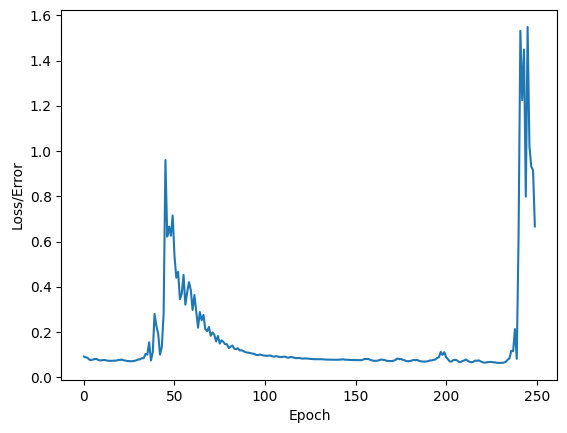

In [47]:
epochs = 250

losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 50 == 0:
    print(f'Epoch: {i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(correct / len(y_test.numpy()))

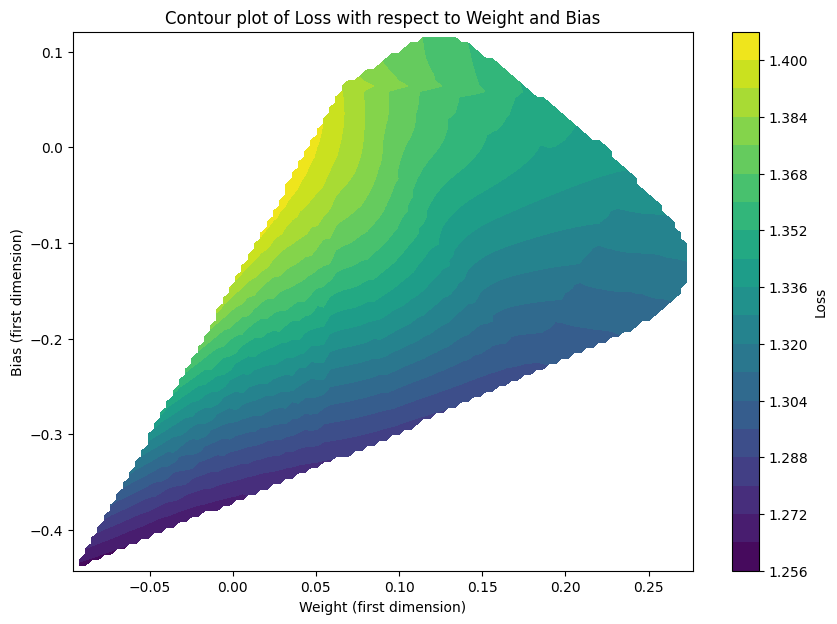

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import torch
import torch.nn as nn

# Simulate a simple model for demonstration
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(7, 10)
        self.fc2 = nn.Linear(10, 4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Generate random data for demonstration
input_data = np.random.rand(200, 7)  # Assuming 7 input features
output_data = np.random.randint(0, 4, size=(200,))  # Assuming 4 output classes

# Define the model
model = Model()

# Define loss function (assuming classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Number of epochs for training
epochs = 500

# Lists to store losses and parameters
losses = []
parameters = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(torch.Tensor(input_data))
    loss = criterion(outputs, torch.LongTensor(output_data))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss and parameters
    losses.append(loss.item())
    parameters.append([param.detach().numpy().flatten() for param in model.parameters()])

# Extract weights and biases from parameters
weights = []
biases = []
for param_set in parameters:
    w = []
    b = []
    for i, param in enumerate(param_set):
        if i % 2 == 0:  # Weights
            w.extend(param)
        else:  # Biases
            b.extend(param)
    weights.append(np.array(w))
    biases.append(np.array(b))

# Convert to numpy arrays
weights = np.array(weights)
biases = np.array(biases)
losses = np.array(losses)

# Take the first two dimensions for visualization
weights_2d = weights[:, :2]
biases_2d = biases[:, :2]

# Create a grid of weight and bias values
grid_x, grid_y = np.mgrid[
    weights_2d[:, 0].min():weights_2d[:, 0].max():100j,
    biases_2d[:, 0].min():biases_2d[:, 0].max():100j
]

# Interpolate the loss values on the grid
grid_z = griddata((weights_2d[:, 0], biases_2d[:, 0]), losses, (grid_x, grid_y), method='cubic')

# Plot the contour plot
plt.figure(figsize=(10, 7))
contour = plt.contourf(grid_x, grid_y, grid_z, cmap='viridis', levels=20)
plt.colorbar(contour, label='Loss')
plt.xlabel('Weight (first dimension)')
plt.ylabel('Bias (first dimension)')
plt.title('Contour plot of Loss with respect to Weight and Bias')
plt.show()

100
100
500


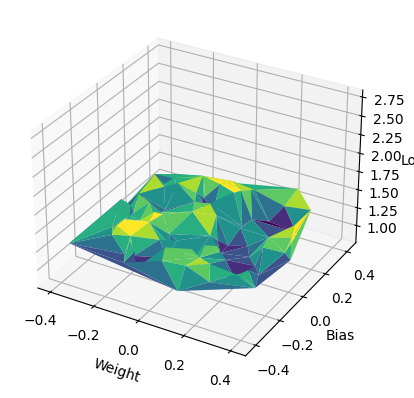

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for demonstration
input_data = np.random.rand(200, 7)  # Assuming 7 input features
output_data = np.random.rand(200, 4)  # Assuming 4 output classes

# Define the model
model = Model()

# Define loss function (assuming classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Number of epochs for training
epochs = 500

# Lists to store losses and parameters
losses = []
parameters = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(torch.Tensor(input_data))
    loss = criterion(outputs, torch.LongTensor(np.argmax(output_data, axis=1)))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss and parameters
    losses.append(loss.item())
    parameters.append(list(model.parameters()))

# Extract weights and biases from parameters
weights = []
biases = []
for param_set in parameters:
    w = []
    b = []
    for param in param_set:
        if param.requires_grad:
            if len(param.data.shape) == 2:  # Weights
                w.append(param.data.numpy().ravel())
            else:  # Biases
                b.append(param.data.numpy())
    weights.append(np.concatenate(w))
    biases.append(np.concatenate(b))

# Plot 3D surface of loss with respect to weights and biases
weights = np.array(weights)
biases = np.array(biases)
losses = np.array(losses)

weights = weights.tolist()
biases = biases.tolist()

for i in range(100, 44900):
  weights[0].pop()

for i in range(130, 699):
  biases[0].pop()

for i in range(len(losses)):
  losses[i] = round(losses[i], 1)

print(len(weights[0]))
print(len(biases[0]))
print(len(losses))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(weights[0], biases[0], losses, cmap='viridis', edgecolor='none')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')

plt.show()
